Импортируем все библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
import pandas as pd
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score

Задание 1.

K=1: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 1.00
K=2: Точность на обучающей выборке: 0.98, Точность на тестовой выборке: 0.96
K=3: Точность на обучающей выборке: 0.95, Точность на тестовой выборке: 1.00
K=4: Точность на обучающей выборке: 0.95, Точность на тестовой выборке: 0.96
K=5: Точность на обучающей выборке: 0.94, Точность на тестовой выборке: 1.00
K=6: Точность на обучающей выборке: 0.94, Точность на тестовой выборке: 1.00
K=7: Точность на обучающей выборке: 0.95, Точность на тестовой выборке: 1.00
K=8: Точность на обучающей выборке: 0.92, Точность на тестовой выборке: 1.00


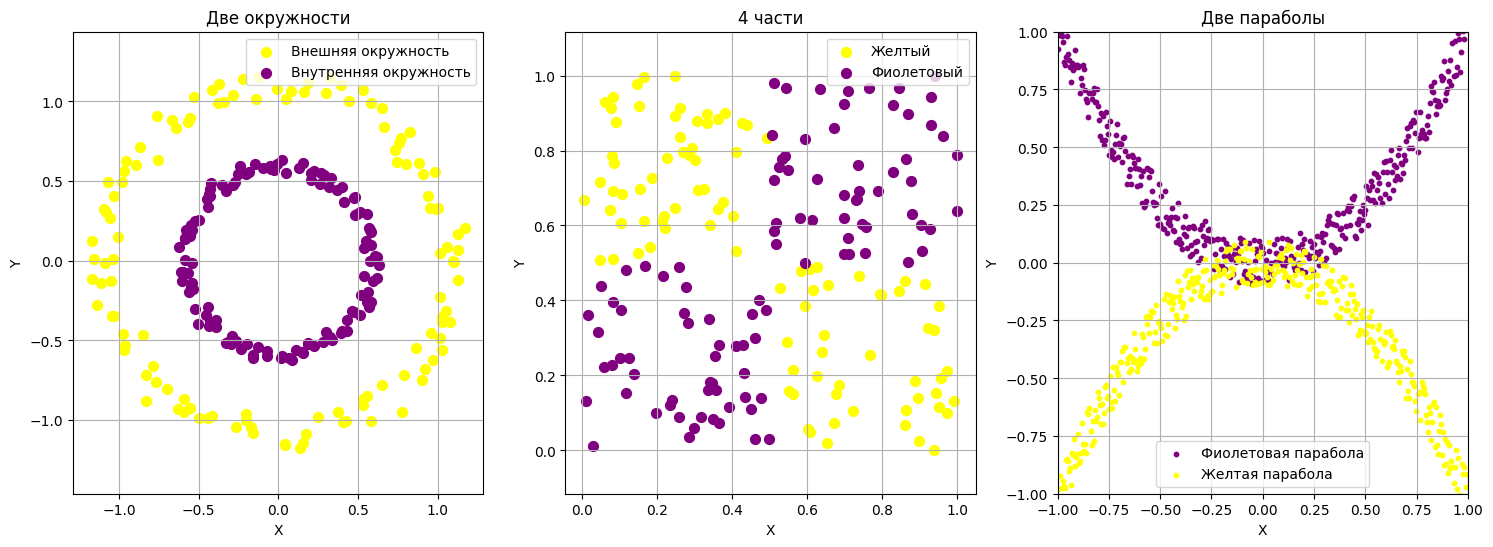

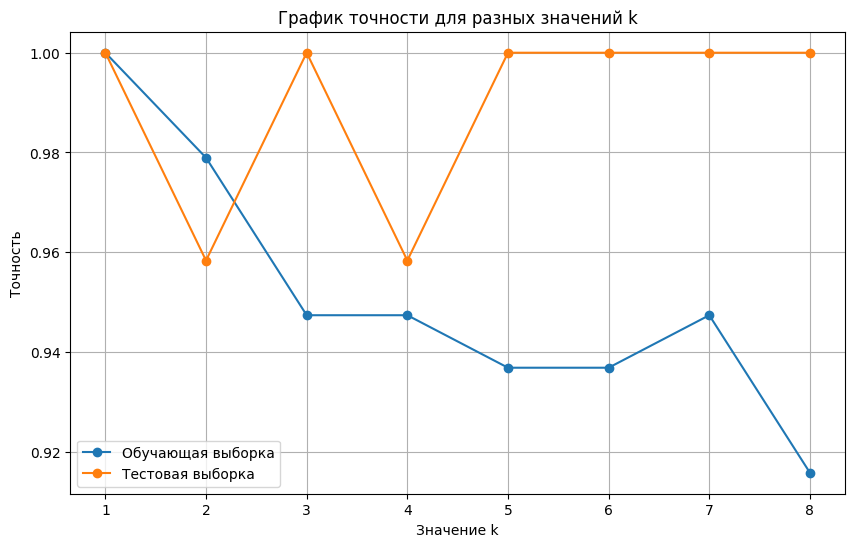

K=1: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 0.97
K=2: Точность на обучающей выборке: 0.97, Точность на тестовой выборке: 0.92
K=3: Точность на обучающей выборке: 0.98, Точность на тестовой выборке: 0.95
K=4: Точность на обучающей выборке: 0.98, Точность на тестовой выборке: 0.92
K=5: Точность на обучающей выборке: 0.97, Точность на тестовой выборке: 0.95
K=6: Точность на обучающей выборке: 0.95, Точность на тестовой выборке: 0.95
K=7: Точность на обучающей выборке: 0.95, Точность на тестовой выборке: 0.97
K=8: Точность на обучающей выборке: 0.95, Точность на тестовой выборке: 0.92


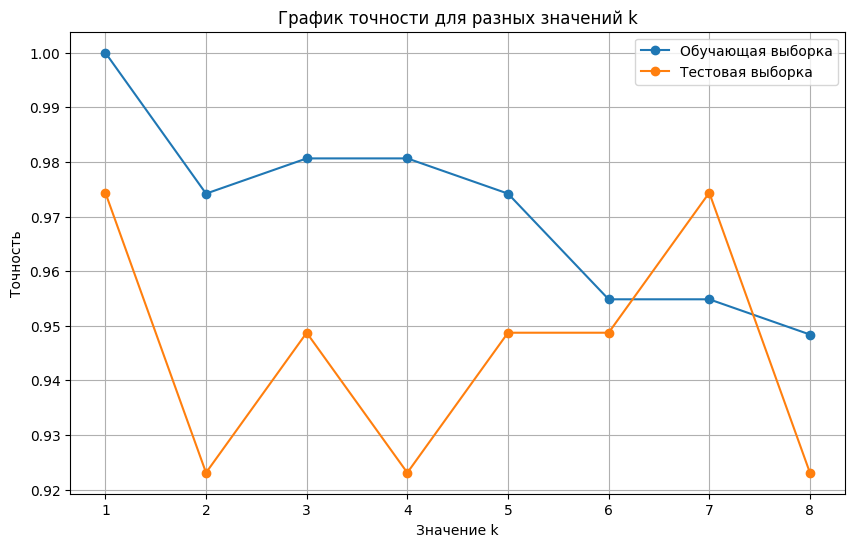

K=1: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 1.00
K=2: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 1.00
K=3: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 1.00
K=4: Точность на обучающей выборке: 0.99, Точность на тестовой выборке: 1.00
K=5: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 1.00
K=6: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 1.00
K=7: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 1.00
K=8: Точность на обучающей выборке: 1.00, Точность на тестовой выборке: 1.00


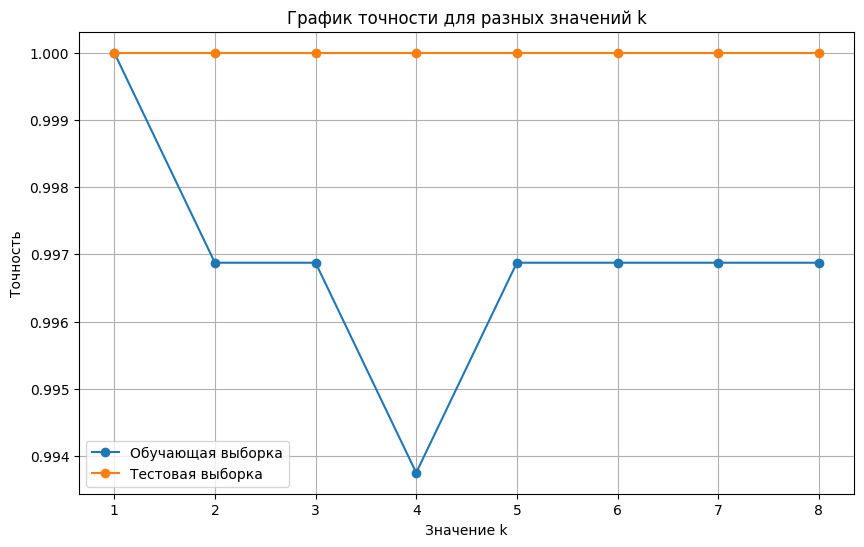

In [4]:
def create_random_points(num_points):
    X = np.random.random((num_points, 2))
    y = np.zeros(num_points, dtype=int)
    y[(X[:, 0] > 0.5) & (X[:, 1] > 0.5)] = 1
    y[(X[:, 0] <= 0.5) & (X[:, 1] <= 0.5)] = 1
    return X, y

def generate_random_circles_and_compressed_parabolas():
    np.random.seed()
    
    outer_radius = np.random.uniform(0.7, 1.3)
    inner_radius = np.random.uniform(0.3, 0.6)
    num_points = np.random.randint(100, 201)
    theta = np.linspace(0, 2 * np.pi, num_points)
    x_outer = outer_radius * np.cos(theta) + np.random.uniform(-0.1, 0.1, num_points)
    y_outer = outer_radius * np.sin(theta) + np.random.uniform(-0.1, 0.1, num_points)
    x_inner = inner_radius * np.cos(theta) + np.random.uniform(-0.05, 0.05, num_points)
    y_inner = inner_radius * np.sin(theta) + np.random.uniform(-0.05, 0.05, num_points)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].scatter(x_outer, y_outer, c='yellow', label='Внешняя окружность', s=50)
    axes[0].scatter(x_inner, y_inner, c='purple', label='Внутренняя окружность', s=50)
    axes[0].set_title('Две окружности')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()
    axes[0].grid(True)
    axes[0].axis('equal')

    n2 = np.random.randint(100, 201)
    X2, y2 = create_random_points(n2)
    axes[1].scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], c='yellow', label='Желтый', s=50)
    axes[1].scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], c='purple', label='Фиолетовый', s=50)
    axes[1].set_title('4 части')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')
    axes[1].legend()
    axes[1].grid(True)
    axes[1].axis('equal')
    
    x_left_parabola = np.linspace(-1, 1, 400)
    y_left_parabola = x_left_parabola**2 + np.random.uniform(-0.1, 0.1, 400)
    
    x_right_parabola = np.linspace(-1, 1, 400)
    y_right_parabola = -x_right_parabola**2 + np.random.uniform(-0.1, 0.1, 400)
    
    axes[2].scatter(x_left_parabola, y_left_parabola, c='purple', label='Фиолетовая парабола', s=10)
    axes[2].scatter(x_right_parabola, y_right_parabola, c='yellow', label='Желтая парабола', s=10)
    axes[2].set_xlim(-1, 1)
    axes[2].set_ylim(-1, 1)
    axes[2].set_title('Две параболы')
    axes[2].set_xlabel('X')
    axes[2].set_ylabel('Y')
    axes[2].legend()
    axes[2].grid(True)
    
    root = tk.Tk()
    root.title("Задание 1")
    
    text_boxes = []
    for i in range(3):
        text = tk.Text(root, height=7, width=60)
        text.grid(row=1, column=i, padx=10, pady=10)
        text_boxes.append(text)
    
    
    def display_accuracy_data(graph_index):
        if graph_index == 0:
            X, y = create_random_points(num_points)
        elif graph_index == 1:
            X, y = create_random_points(n2)
        else:
            X = np.column_stack((x_left_parabola, y_left_parabola))
            y = np.zeros(400, dtype=int)
            y[x_left_parabola >= 0] = 1
        
        train_accuracies, test_accuracies = split_and_evaluate(X, y)
        
        text = f"Точность обучения: {train_accuracies}\nТочность теста: {test_accuracies}"
        text_boxes[0].delete(1.0, tk.END)
        text_boxes[0].insert(tk.END, text)
    
    button_3 = tk.Button(root, text="Показать данные о точности (График 1)", command=lambda: display_accuracy_data(0))
    button_4 = tk.Button(root, text="Показать данные о точности (График 2)", command=lambda: display_accuracy_data(1))
    button_5 = tk.Button(root, text="Показать данные о точности (График 3)", command=lambda: display_accuracy_data(2))
    
    button_3.grid(row=2, column=0)
    button_4.grid(row=3, column=0)
    button_5.grid(row=4, column=0)
    
    for i, ax in enumerate(axes):
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.grid(row=0, column=i)
    
    root.geometry('1800x1200')
    root.mainloop()

def split_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    k_values = [1, 2, 3, 4, 5, 6, 7, 8]
    
    train_accuracies = []
    test_accuracies = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        train_predictions = knn.predict(X_train)
        test_predictions = knn.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, train_predictions)
        test_accuracy = accuracy_score(y_test, test_predictions)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
        print(f'K={k}: Точность на обучающей выборке: {train_accuracy:.2f}, Точность на тестовой выборке: {test_accuracy:.2f}')
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, train_accuracies, marker='o', label='Обучающая выборка')
    plt.plot(k_values, test_accuracies, marker='o', label='Тестовая выборка')
    plt.title('График точности для разных значений k')
    plt.xlabel('Значение k')
    plt.ylabel('Точность')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return train_accuracies, test_accuracies

generate_random_circles_and_compressed_parabolas()


Задание 2.

In [9]:
y_true = np.array(['C', 'C', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'])
y_pred = np.array(['C', 'C', 'C', 'C', 'H', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H'])

classes = ['C', 'F', 'H']

confusion_matrix = np.zeros((len(classes), len(classes)), dtype=int)

for i in range(len(y_true)):
    true_class = y_true[i]
    pred_class = y_pred[i]
    true_idx = classes.index(true_class)
    pred_idx = classes.index(pred_class)
    confusion_matrix[true_idx][pred_idx] += 1

precision = np.zeros(len(classes), dtype=float)
recall = np.zeros(len(classes), dtype=float)
f1_score = np.zeros(len(classes), dtype=float)
support = np.zeros(len(classes), dtype=int)

for i in range(len(classes)):
    true_positive = confusion_matrix[i][i]
    false_positive = np.sum(confusion_matrix[:, i]) - true_positive
    false_negative = np.sum(confusion_matrix[i, :]) - true_positive
    true_negative = np.sum(confusion_matrix) - true_positive - false_positive - false_negative

    precision[i] = true_positive / (true_positive + false_positive)
    recall[i] = true_positive / (true_positive + false_negative)
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    support[i] = np.sum(confusion_matrix[i, :])

accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

weighted_precision = np.sum(precision * support) / np.sum(support)
weighted_recall = np.sum(recall * support) / np.sum(support)
weighted_f1_score = np.sum(f1_score * support) / np.sum(support)

macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1_score = np.mean(f1_score)

print("\n{:<12} {:<15} {:<15} {:<15} {:<15}".format("", "precision", "recall", "f1-score", "support"))
for i in range(len(classes)):
    print("{:<12} {:<15.3f} {:<15.3f} {:<15.3f} {:<15}".format(classes[i], precision[i], recall[i], f1_score[i], support[i]))
print("\n{:<12} {:<15} {:<15} {:<15} {:<15}".format("weighted avg", weighted_precision, weighted_recall, weighted_f1_score, np.sum(support)))
print("{:<12} {:<15} {:<15} {:<15} {:<15}".format("macro avg", macro_precision, macro_recall, macro_f1_score, ""))
print("\naccuracy: {:.3f}".format(accuracy))



             precision       recall          f1-score        support        
C            0.308           0.667           0.421           6              
F            0.667           0.200           0.308           10             
H            0.667           0.667           0.667           9              

weighted avg 0.5805128205128205 0.48            0.46412955465587047 25             
macro avg    0.547008547008547 0.5111111111111111 0.46513720197930725                

accuracy: 0.480


Задание 3.

In [2]:
data = pd.read_csv('dataset.csv')

X = data[['buy_vol', 'sell_vol', 'buy_sell_ratio']]

y = data['buy_sell_ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_buy_vol = LinearRegression()
model_buy_vol.fit(X_train[['buy_vol']], y_train)

model_sell_vol = LinearRegression()
model_sell_vol.fit(X_train[['sell_vol']], y_train)

model_buy_sell_ratio = LinearRegression()
model_buy_sell_ratio.fit(X_train[['buy_sell_ratio']], y_train)

y_train_pred_buy_vol = model_buy_vol.predict(X_train[['buy_vol']])
y_test_pred_buy_vol = model_buy_vol.predict(X_test[['buy_vol']])

y_train_pred_sell_vol = model_sell_vol.predict(X_train[['sell_vol']])
y_test_pred_sell_vol = model_sell_vol.predict(X_test[['sell_vol']])

y_train_pred_buy_sell_ratio = model_buy_sell_ratio.predict(X_train[['buy_sell_ratio']])
y_test_pred_buy_sell_ratio = model_buy_sell_ratio.predict(X_test[['buy_sell_ratio']])

r2_train_buy_vol = r2_score(y_train, y_train_pred_buy_vol)
r2_test_buy_vol = r2_score(y_test, y_test_pred_buy_vol)

r2_train_sell_vol = r2_score(y_train, y_train_pred_sell_vol)
r2_test_sell_vol = r2_score(y_test, y_test_pred_sell_vol)

r2_train_buy_sell_ratio = r2_score(y_train, y_train_pred_buy_sell_ratio)
r2_test_buy_sell_ratio = r2_score(y_test, y_test_pred_buy_sell_ratio)

print("R2 для модели buy_vol: Train =", r2_train_buy_vol, "Test =", r2_test_buy_vol)
print("R2 для модели sell_vol: Train =", r2_train_sell_vol, "Test =", r2_test_sell_vol)
print("R2 для модели buy_sell_ratio: Train =", r2_train_buy_sell_ratio, "Test =", r2_test_buy_sell_ratio)

R2 для модели buy_vol: Train = 0.00039642726689426144 Test = 0.000535088078852608
R2 для модели sell_vol: Train = 0.008942942372270335 Test = 0.014557333453544818
R2 для модели buy_sell_ratio: Train = 1.0 Test = 1.0
